In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV

In [4]:
data = pd.read_csv('C:/Users/Veena Chintala/Desktop/Take_home/Conversion_rate/conversion_data.csv')
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [5]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [6]:
data[data['age']<100].describe()

,age,new_user,total_pages_visited,converted
count,316198.000000,316198.000000,316198.000000,316198.000000
mean,30.569311,0.685469,4.872918,0.032252
std,8.268958,0.464329,3.341053,0.176669
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,79.000000,1.000000,29.000000,1.000000


In [7]:
data = data[data['age']<100]
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


# Inspect Country's distribution and its relationship with conversion

In [8]:
coun = data['country'].value_counts()

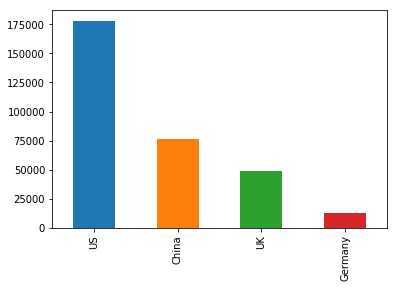

In [9]:
coun.plot(kind = 'bar');

In [12]:
country = data.groupby('country')['converted'].mean()#.apply(lambda x: x.value_counts(normalize = True)).unstack()


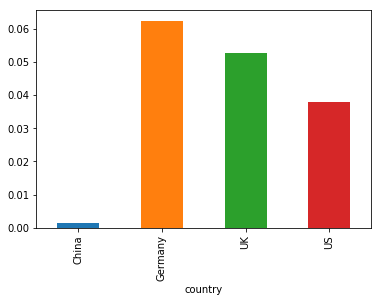

In [11]:
country.plot(kind = 'bar');

## Though China has more users the conversion rate is very low and Germany has very less users but conversion rate is high.

# Analysis based on age

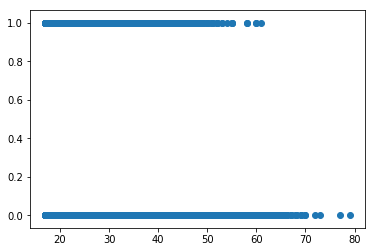

In [14]:
plt.scatter(data.age, data.converted);

In [22]:
age = data.groupby(data['age'])['converted'].apply(lambda x:x.value_counts(normalize = True)).sort_values(ascending = False).unstack()
age.head(10)

,0,1
age,,
17,0.928393,0.071607
18,0.933971,0.066029
19,0.941384,0.058616
20,0.942891,0.057109
21,0.946015,0.053985
22,0.946757,0.053243
23,0.952010,0.047990
24,0.954552,0.045448
25,0.961218,0.038782


## Conversion rate is almost zero after the age of 55. Clearly youngsters have better conversion rate.

# Impact of total pages visited on conversion rate

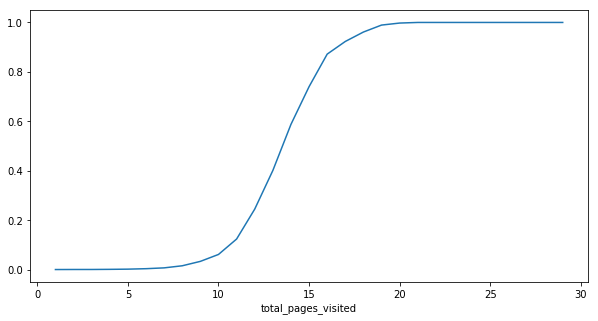

In [19]:
pge = data.groupby(data['total_pages_visited'])['converted'].mean().sort_values(ascending = False)
pge.plot(kind ='line', figsize = (10,5));

### Definitely spending more time on the site implies higher probability of conversion

# Data Modeling

In [15]:
data.head(1)

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0


In [16]:
X = data.loc[:,('country','age','new_user','source','total_pages_visited')]
X=pd.get_dummies(X)
X.head()

,age,new_user,total_pages_visited,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0,1,0,1,0,0
1,23,1,5,0,0,0,1,0,0,1
2,28,1,4,0,0,0,1,0,0,1
3,39,1,5,1,0,0,0,0,0,1
4,30,1,6,0,0,0,1,0,0,1


In [18]:
y = data.converted
y.value_counts(), y.mean()


(0    306000
 1     10198
 Name: converted, dtype: int64, 0.03225194340255157)

# y very imbalanced

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33)

In [25]:
y_train.mean(),y_test.mean()

(0.03232917319638238, 0.0320951449983708)

In [24]:
logCV = LogisticRegressionCV(Cs = np.logspace(-3,3,7),
                            dual=False,
                            scoring='roc_auc',
                            max_iter=1000,
                            n_jobs=-1,
                            verbose=1)
logCV.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   11.3s finished


LogisticRegressionCV(Cs=array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
           class_weight=None, cv='warn', dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=1000, multi_class='warn',
           n_jobs=-1, penalty='l2', random_state=None, refit=True,
           scoring='roc_auc', solver='lbfgs', tol=0.0001, verbose=1)

In [28]:
logCV.scores_

{1: array([[0.98164977, 0.98442784, 0.98523935, 0.98536531, 0.98537568,
         0.98537568, 0.98537568],
        [0.98467203, 0.98777262, 0.9884587 , 0.98848028, 0.98847628,
         0.98847628, 0.98847628],
        [0.98169209, 0.98473745, 0.98543104, 0.98547454, 0.98547448,
         0.98547448, 0.98547448]])}

In [31]:
logCV.score(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1920: ChangedBehaviorWarning: The long-standing behavior to use the accuracy score has changed. The scoring parameter is now used. This warning will disappear in version 0.22.
  ChangedBehaviorWarning)


0.9865076473527343

In [32]:
logCV.score(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1920: ChangedBehaviorWarning: The long-standing behavior to use the accuracy score has changed. The scoring parameter is now used. This warning will disappear in version 0.22.
  ChangedBehaviorWarning)


0.9865076473527343

In [33]:
1-y_test.mean()

0.9679048550016291

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

y_pred = logCV.predict(X_test)
print(classification_report(y_true= y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    100997
           1       0.84      0.68      0.75      3349

   micro avg       0.99      0.99      0.99    104346
   macro avg       0.91      0.84      0.87    104346
weighted avg       0.98      0.99      0.99    104346



In [43]:
feature_imp = pd.DataFrame({'name':X_train.columns,'co-eff':logCV.coef_[0]})
feature_imp.sort_values(by=['co-eff'],ascending = False)

,name,co-eff
4,country_Germany,1.167195
5,country_UK,0.876795
2,total_pages_visited,0.766946
6,country_US,0.531376
7,source_Ads,0.068040
9,source_Seo,0.024263
0,age,-0.074715
8,source_Direct,-0.164652
1,new_user,-1.754139
3,country_China,-2.647715


# Some conclusions and suggestions:
## 1. The site is working very well for young users. Definitely let’s tell marketing to advertise and use marketing channel which are more likely to reach young people.
## 2. The site is working very well for Germany in terms of conversion. But the summary showed that there are few Germans coming to the site: way less than UK, despite a larger population. Again, marketing should get more Germans. Big opportunity.
## 3. Users with old accounts do much better. Targeted emails with offers to bring them back to the site could be a good idea to try.
## 4. Something is wrong with the Chinese version of the site. It is either poorly translated, doesn’t fit the local culture, some payment issue or maybe it is just in English! Given how many users are based in China, fixing this should be a top priority. Huge opportunity.
## 5. Maybe go through the UI and figure out why older users perform so poorly? From 30 y/o conversion clearly starts dropping.
## 6. If I know someone has visited many pages, but hasn’t converted, she almost surely has high purchase intent. I could email her targeted offers or sending her reminders. Overall, these are probably the easiest users to make convert.

## From the model we can see Germany and UK has highest conversion rate.
## People visiting the site through Ads has better convesion rate.
## Age and new user are negatively correlated. 